# MMAI 894 - Deep Learning
## Dr. Ofer Shai
## Team Bloor
### Pothole Detection Model
Benchmark Model - AlexNet


### 1. Import Modules and Libraries

In [1]:
# Install module for importing Keras Tuner

!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.8MB/s 


In [2]:
# Import modules
from sklearn.datasets import fetch_openml
import numpy as np
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical
import kerastuner as kt

np.random.seed(123)
tf.random.set_seed(123)

### 2. Load Data


*   Data is loaded from Dropbox
*   There are two (2) datasets that will be uploaded as zipped files and then unzipped in this notebook



In [3]:
!wget https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0

--2021-04-04 17:24:20--  https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip [following]
--2021-04-04 17:24:20--  https://www.dropbox.com/s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb9d5ba38a23a6312fa6b89e04.dl.dropboxusercontent.com/cd/0/inline/BL_0ikmSXU6djwYrsHCTHF9dTrtHz8FwXAlJm8MLJZvg4nioxMWSO5Re6IEtnzo2vV_AAMGrRrGos9ICZhmX-wNY36lwQ8ROD2z3jXkC4rtnij-ZAGkj4hgCnWSNyywwlpaPR7jd-u8IkTS9vVgNbF0O/file# [following]
--2021-04-04 17:24:20--  https://ucdb9d5ba38a23a6312fa6b89e04.dl.dropboxusercontent.com/cd/0/inline/BL_0ikmSXU6djwYrsHCTHF9dTrtHz8FwXAlJm8MLJZvg4nioxMWSO5Re6IEtnzo2vV_AAM

In [4]:
!wget https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0

--2021-04-04 17:24:26--  https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/edhsf4jxdwdbddz/potholes.zip [following]
--2021-04-04 17:24:27--  https://www.dropbox.com/s/raw/edhsf4jxdwdbddz/potholes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9bb54813c4f523040a24b48b6e.dl.dropboxusercontent.com/cd/0/inline/BL93Yq1-dlFICvS4BiuZzY9FiCA8VApUp_ma7AXE_uaompWZF_VUxcQ6XPL5jAuwzJrd17AOaFw2aSdcBIFsZZjjhjf2RXG2L2ojIzpJ9tDJkhem4RD8sitOOpx4bNfIPMxdlS-HULQ4AjnqHfHsjsSi/file# [following]
--2021-04-04 17:24:27--  https://uc9bb54813c4f523040a24b48b6e.dl.dropboxusercontent.com/cd/0/inline/BL93Yq1-dlFICvS4BiuZzY9FiCA8VApUp_ma7AXE_uaompWZF_VUxcQ6XPL5jAuwzJrd17AOaFw2aSdcBIFsZ

In [5]:
# Unzip the No Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/no_pothole_v2.zip?dl=0'

In [6]:
# Unzip the Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/potholes.zip?dl=0'

### 3. Data Preprocessing

The following steps will be taken to preprocess the data:
1.   Read in the images from the datasets and resize them
2.   Assign each image a label (i.e. No Pothole vs Pothole)
3.   Plot sample images to assure the labels have been assigned correctly
4.   Encode the labels
5. Split the data into training and test sets



In [7]:
# This function reads in the images one at a time through the 'for' loop and resizes them and assigns a label

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

In [8]:
# Running the 'make_train_data' function defined above on the two (2) datasets
# X will be a list of images, stored as an array
# Z will be a list of labels 

X=[]
Z=[]
IMG_SIZE=250

no_potholes='../content/no_pothole_v2/'
potholes='../content/potholes/'

make_train_data('NO POTHOLES',no_potholes)
make_train_data('POTHOLES',potholes)

100%|██████████| 718/718 [00:07<00:00, 91.26it/s]


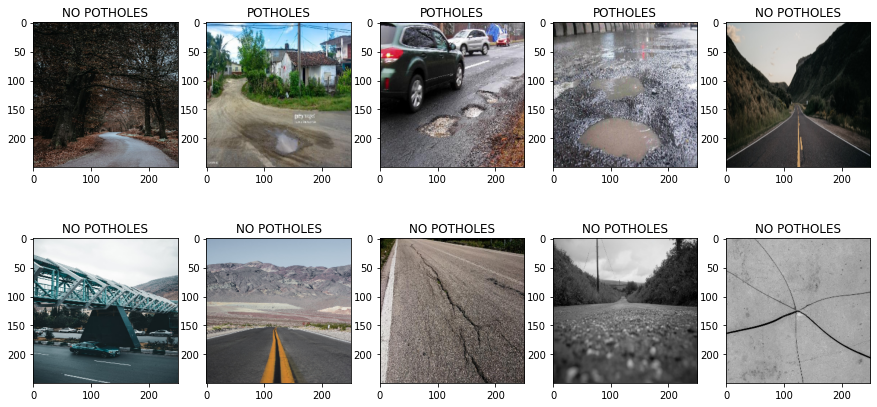

In [9]:
# Plotting ten (10) randomly selected images, along with their assigned labels as the title

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [10]:
# Encoding the labels and assigning the encoded labels to 'Y'

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)

print(Y)

X=np.array(X)

# Split data into training and test sets
# Assigning 15% of the data to the test sets and remaining to the training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

[0 0 0 ... 1 1 1]


In [11]:
# Printing shapes of X, X_train, and X_test to assure the split was done correctly

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1534, 250, 250, 3)
(1107, 250, 250, 3)
(231, 250, 250, 3)
(196, 250, 250, 3)


### 4. Modelling - Training and Building Model


*   Building the model based on the AlexNet architecture



In [12]:
# Building model inside a 'model_builder' function, which will be used in the hyperparameter tuner

model = Sequential()

# First convolution layer
model.add(Conv2D(filters = 96, kernel_size = (11,11), strides=(4,4), padding = 'valid', activation ='relu', input_shape = (250, 250, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Second convolution layer
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Third convolution layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth convolution layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fifth convolution layer
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides=(1,1), padding = 'same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

# First dense layer
model.add(Dense(units=4096, input_shape = (250*250*3,), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
  
# Second dense layer
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Third dense layer
model.add(Dense(units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1,  activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       8

In [13]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [14]:
# Train model

history = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=50, verbose=1,validation_data=(X_val, Y_val))

Epoch 1/50
35/35 [==============================] - 20s 65ms/step - loss: 0.8361 - accuracy: 0.5867 - val_loss: 0.6946 - val_accuracy: 0.5051
Epoch 2/50
35/35 [==============================] - 1s 34ms/step - loss: 0.5902 - accuracy: 0.7223 - val_loss: 0.6091 - val_accuracy: 0.7092
Epoch 3/50
35/35 [==============================] - 1s 35ms/step - loss: 0.5605 - accuracy: 0.7489 - val_loss: 0.7403 - val_accuracy: 0.5510
Epoch 4/50
35/35 [==============================] - 1s 35ms/step - loss: 0.4813 - accuracy: 0.7801 - val_loss: 0.7202 - val_accuracy: 0.6173
Epoch 5/50
35/35 [==============================] - 1s 34ms/step - loss: 0.4900 - accuracy: 0.7778 - val_loss: 0.7052 - val_accuracy: 0.6888
Epoch 6/50
35/35 [==============================] - 1s 35ms/step - loss: 0.4825 - accuracy: 0.7952 - val_loss: 0.6115 - val_accuracy: 0.7653
Epoch 7/50
35/35 [==============================] - 1s 34ms/step - loss: 0.4607 - accuracy: 0.8191 - val_loss: 0.4538 - val_accuracy: 0.8316
Epoch 8/50
3

### 5. Model Evaluation

In [15]:
# Evaluate model
# This model has trained on the full 50 epochs

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


8/8 [==============================] - 0s 27ms/step - loss: 0.7893 - accuracy: 0.7186
Test Loss: 0.789, Test Accuracy: 0.719


In [16]:
# Generate Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

target_names = ['No Pothole', 'Pothole']

print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

  No Pothole       0.72      0.74      0.73       120
     Pothole       0.71      0.69      0.70       111

    accuracy                           0.72       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.72      0.72      0.72       231



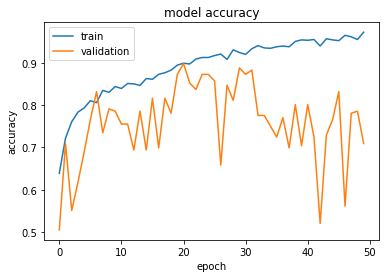

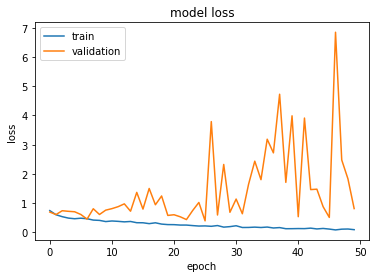

In [17]:
# Plot training and validation accuracy and loss over epochs

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()